# Comparison of Root Node Selection

In [1]:
from mmot import MMOTSolver

import numpy as np 
import matplotlib.pyplot as plt 

from scipy.ndimage import gaussian_filter

## Simple Translation

In [2]:
# Grid of size n1 x n2
n1 = 128   # x axis
n2 = 128   # y axis

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

r = 0.125

positions = np.array([[0.2,0.8],
                      [0.4,0.6],
                      [0.6,0.4],
                      [0.8,0.2]])

# measures = [None]*len(positions)
measures = [None]*(len(positions))

for i in range(len(positions)):
    xc,yc = positions[i]
    measures[i] = np.zeros((n2, n1))
    measures[i][(x-xc)**2 + (y-yc)**2 < r**2] = 1

    # Normalize
    measures[i] *= n1*n2 / np.sum(measures[i])

    measures[i] = np.flipud(measures[i])


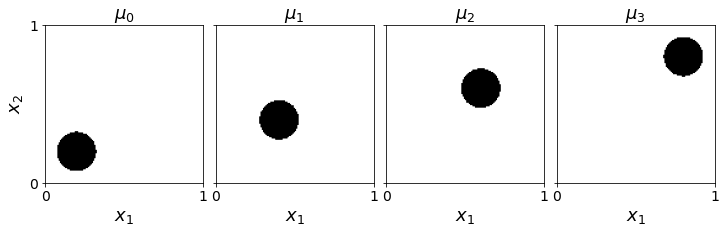

In [3]:

def plot_measures(measures, filename):

    fig, ax = plt.subplots(1, len(measures), figsize=(12,6),sharey=True)
    for i in range(len(measures)):
        ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1), cmap='Greys')
        ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i),fontsize=18)
        ax[i].set_xlabel('$x_1$',fontsize=18)
        ax[i].set_xticks([0,1])
        ax[i].set_yticks([0,1])

        ax[i].tick_params(axis='x',labelsize=14)
        ax[i].tick_params(axis='y',labelsize=14)

    ax[0].set_ylabel('$x_2$',fontsize=18)
    plt.subplots_adjust(wspace=0.08)

    plt.savefig(filename,bbox_inches='tight')
    plt.show()
    
plot_measures(measures, 'CycleMeasures1.pdf')

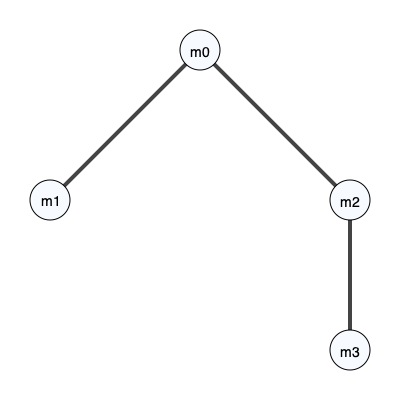

In [4]:
unroll_node = 0

edge_list = [[0,1],
             [0,2],
             [2,3]]


prob = MMOTSolver(measures, edge_list, x, y, unroll_node)

prob.Visualize('original', filename='CycleCostGraph.svg')

In [5]:
root_node_options = [[i] for i in range(len(measures))] + ['all']
results1 = []
for root_nodes in root_node_options:
    results1.append( prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-6, gtol_abs=1e-5, root_nodes=root_nodes) )

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  9.3533e-02,   1.6487e+00,         0
       10,   0.1780,  1.8999e-01,   1.0794e-01,         0
       20,   0.0713,  2.0181e-01,   1.1863e-02,         0
       30,   0.1712,  2.0945e-01,   6.7757e-03,         0
       40,   0.0171,  2.1453e-01,   3.1930e-02,         4
       50,   0.0103,  2.1773e-01,   8.9650e-03,         0
       60,   0.0247,  2.1996e-01,   4.3413e-02,         4
       70,   0.0149,  2.2207e-01,   6.3143e-03,         0
       80,   0.0179,  2.2366e-01,   4.2477e-03,         0
       90,   0.0107,  2.2508e-01,   4.5496e-03,         0
      100,   0.0129,  2.2621e-01,   8.3098e-03,         5
      110,   0.0077,  2.2716e-01,   1.4581e-02,         6
      120,   0.4463,  2.2806e-01,   9.0279e-04,         0
      130,   0.2681,  2.2867e-01,   6.5241e-04,         0
      140,   0.3221,  2.2934e-01,   5.2032e-04,         0
      150,   0.1935,  2.2980e-01,   4.3518e-04,         0
      160,   0

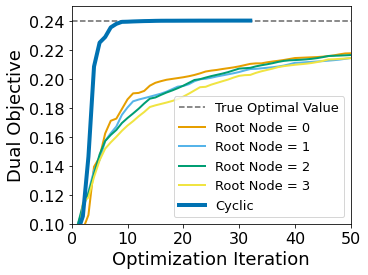

In [6]:
def plot_history(results, xlim, ylim):
    colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7'] # colorblind safe, from https://davidmathlogic.com/colorblind


    for i,res in enumerate(results):
        if(root_node_options[i]!='all'):
            plt.plot(res.costs,label='Root Node = {}'.format(root_node_options[i][0]), c=colors[i], linewidth=2)
        else:
            plt.plot(res.costs,label='Cyclic',linewidth=4, c=colors[i])

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.ylabel('Dual Objective',fontsize=18)
    plt.xlabel('Optimization Iteration',fontsize=18)
    plt.legend(fontsize=13) 
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

plt.figure(figsize=(5,4))
true_val = 3*(0.2**2 + 0.2**2)
plt.plot([0,300],[true_val,true_val], '--k', alpha=0.6,label='True Optimal Value')

plot_history(results1, [0,50], [0.1,0.25])

plt.savefig('CyclePerformance1.pdf',bbox_inches='tight')
plt.show()

## More Complicated Marginals

In [7]:
def pad(img,pad_size=5):
    temp = np.ones((img.shape[0]+2*pad_size,img.shape[1]+2*pad_size))
    temp[pad_size:-pad_size,pad_size:-pad_size] = img
    return temp


In [8]:
measures = [None]*4
measures[0] = np.flipud(1-pad(plt.imread('images/redcross.png')[:, :, 2]))
measures[1] = np.flipud(1-pad(plt.imread('images/tooth.png')[:, :, 2]))
measures[2] = np.flipud(1-pad(plt.imread('images/heart.png')[:, :, 2]))
measures[3] = np.flipud(1-pad(plt.imread('images/duck.png')[:, :, 2]))

for i in range(len(measures)):
    measures[i] *= np.prod(measures[i].shape)/np.sum(measures[i])
   
print('Marginal size = ', measures[0].shape)

# Grid of size n1 x n2
n1,n2 = measures[0].shape

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

Marginal size =  (138, 138)


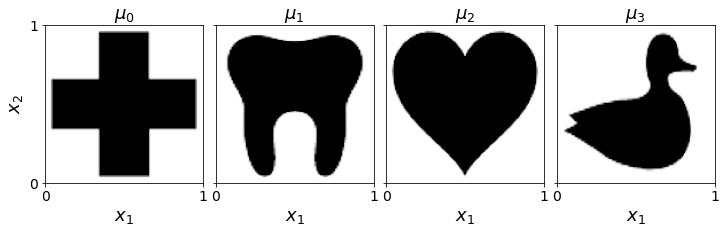

In [9]:
plot_measures(measures, 'CycleMeasures2.pdf')

In [10]:
prob = MMOTSolver(measures, edge_list, x, y, unroll_node)


results2 = []
for root_nodes in root_node_options:
    results2.append( prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-12, gtol_abs=1e-8, root_nodes=root_nodes) )

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  7.5329e-03,   9.2336e-02,         0
       10,   0.1406,  3.4876e-02,   3.9199e-04,         0
       20,   0.1406,  3.5136e-02,   3.8914e-05,         0
       30,   0.1406,  3.5166e-02,   2.1229e-05,         0
       35,   0.0000,  3.5166e-02,   1.9613e-05,        20
Terminating due to failed line search.
Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  1.1772e-03,   9.2336e-02,         0
       10,   0.8438,  3.4884e-02,   2.6147e-04,         0
       20,   1.0000,  3.5124e-02,   5.1051e-05,         0
       30,   1.0000,  3.5163e-02,   2.3160e-05,         0
       36,   0.0000,  3.5164e-02,   1.8731e-05,        20
Terminating due to failed line search.
Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  2.0947e-02,   9.2336e-02,         0
       10,   0.2109,  3.5098e-02,   1.2614e-04,         0
       20,   0.2109,  3.5211e-02,   2.8292e-05,     

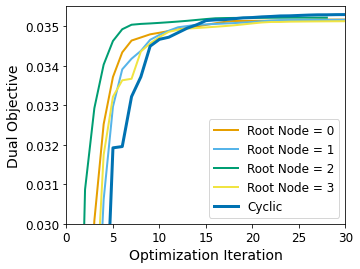

In [ ]:
plt.figure(figsize=(5,4))

plot_history(results2, [0,30], [0.03,0.0355])

plt.savefig('CyclePerformance2.pdf',bbox_inches='tight')
plt.show()

## Complicated Marginals with Translation

In [ ]:
n1, n2 = 512,512
measures = [np.zeros]*4
measures[0] = np.zeros((n1,n2))
measures[0][30:168,30:168] = np.flipud(1-pad(plt.imread('images/redcross.png')[:, :, 2]))

measures[1] = np.zeros((n1,n2))
measures[1][130:268,130:268] = np.flipud(1-pad(plt.imread('images/tooth.png')[:, :, 2]))

measures[2] = np.zeros((n1,n2))
measures[2][230:368,230:368] = np.flipud(1-pad(plt.imread('images/heart.png')[:, :, 2]))

measures[3] = np.zeros((n1,n2))
measures[3][330:468,330:468] = np.flipud(1-pad(plt.imread('images/duck.png')[:, :, 2]))

for i in range(len(measures)):
    measures[i] *= np.prod(measures[i].shape)/np.sum(measures[i])
   
print('Marginal size = ', measures[0].shape)

# Grid of size n1 x n2
n1,n2 = measures[0].shape

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

Marginal size =  (512, 512)


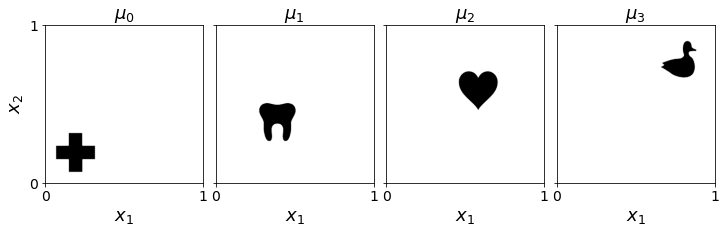

In [ ]:
plot_measures(measures,'CycleMeasures3.pdf')

In [ ]:
prob = MMOTSolver(measures, edge_list, x, y, unroll_node)


results3 = []
for root_nodes in root_node_options:
    results3.append( prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-12, gtol_abs=1e-8, root_nodes=root_nodes) )

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  9.2471e-02,   1.7104e+00,         0
       10,   0.0167,  1.9941e-01,   5.7183e-01,         4
       20,   0.0401,  2.1462e-01,   3.7062e-02,         0
       30,   0.0963,  2.2143e-01,   1.6990e-02,         0
       40,   0.0096,  2.2549e-01,   4.2117e-02,         4
       50,   0.0232,  2.2776e-01,   3.7576e-02,         0
       60,   0.0557,  2.2950e-01,   3.9122e-03,         0
       70,   0.1338,  2.3085e-01,   3.0568e-03,         0
       80,   0.1607,  2.3171e-01,   2.7484e-03,         0
       90,   0.1931,  2.3246e-01,   2.9854e-03,         0
      100,   0.2319,  2.3299e-01,   2.5063e-03,         0
      110,   0.0116,  2.3347e-01,   1.2105e-02,         4
      120,   0.0070,  2.3384e-01,   2.1056e-03,         0
      130,   0.0168,  2.3414e-01,   1.8958e-03,         0
      140,   0.0101,  2.3439e-01,   1.1310e-03,         0
      150,   0.0242,  2.3461e-01,   8.4387e-04,         0
      160,   0

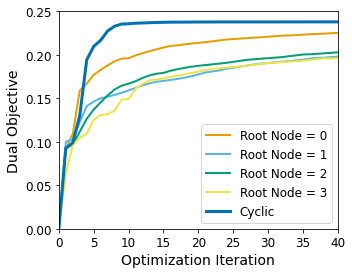

In [ ]:
plt.figure(figsize=(5,4))

plot_history(results3, [0,40], [0,0.25])

plt.savefig('CyclePerformance3.pdf',bbox_inches='tight')
plt.show()